# CSV and Excel

In [98]:
%%writefile file.csv
nr;IP-adres;naam;datum
0000001;10.5.6.2;piet;2016-06-28 18:06:09 UTC
0000002;10.6.2.5;joris;2016-06-29 18:06:09 UTC
0000001;10.5.6.2;piet;2016-06-30 18:06:09 UTC

Overwriting file.csv


In [110]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

### read and write 

In [99]:
df = pd.read_csv('file.csv',quoting=1,sep=";")

In [100]:
df

,nr,IP-adres,naam,datum
0,1,10.5.6.2,piet,2016-06-28 18:06:09 UTC
1,2,10.6.2.5,joris,2016-06-29 18:06:09 UTC
2,1,10.5.6.2,piet,2016-06-30 18:06:09 UTC


In [43]:
df.to_excel('file.xls')

### wat is de type

In [97]:
df.dtypes

nr          object
IP-adres    object
naam        object
datum       object
dtype: object

### date format

In [67]:
df['dateUTC']=pd.to_datetime(df['datum'],format='%Y-%m-%d %H:%M:%S %Z' )

## Search  and selection

In [69]:
df[df['naam'] =='piet']

,nr,IP-adres,naam,datum,dateUTC
0,1,10.5.6.2,piet,2016-06-28 18:06:09 UTC,2016-06-28 18:06:09
2,1,10.5.6.2,piet,2016-06-30 18:06:09 UTC,2016-06-30 18:06:09


In [70]:
df[df['dateUTC'] > date(2016,6,29)]

,nr,IP-adres,naam,datum,dateUTC
1,2,10.6.2.5,joris,2016-06-29 18:06:09 UTC,2016-06-29 18:06:09
2,1,10.5.6.2,piet,2016-06-30 18:06:09 UTC,2016-06-30 18:06:09


In [82]:
df[(df['dateUTC'] > date(2016,6,29)) & (df['naam'] =='piet')]

,nr,IP-adres,naam,datum,dateUTC
2,1,10.5.6.2,piet,2016-06-30 18:06:09 UTC,2016-06-30 18:06:09


In [76]:
df[['naam','datum']]

,naam,datum
0,piet,2016-06-28 18:06:09 UTC
1,joris,2016-06-29 18:06:09 UTC
2,piet,2016-06-30 18:06:09 UTC


In [124]:
df[1:2]

,nr,IP-adres,naam,datum,day
mydate,,,,,
2016-06-29 18:06:09,2,10.6.2.5,joris,2016-06-29 18:06:09 UTC,2016-06-29


In [132]:
df.query(" naam in ['piet','joris']")

,nr,IP-adres,naam,datum,day
mydate,,,,,
2016-06-28 18:06:09,1,10.5.6.2,piet,2016-06-28 18:06:09 UTC,2016-06-28
2016-06-29 18:06:09,2,10.6.2.5,joris,2016-06-29 18:06:09 UTC,2016-06-29
2016-06-30 18:06:09,1,10.5.6.2,piet,2016-06-30 18:06:09 UTC,2016-06-30


In [139]:
df.groupby(['naam']).count()
#df.plot['naam']

,nr,IP-adres,datum,day
naam,,,,
joris,1,1,1,1
piet,2,2,2,2


# Plotting

In [138]:
df.hist?

#plt.show()
df.hist?

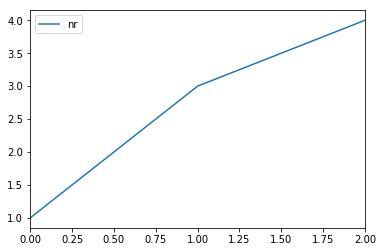

In [111]:
ax1 = df.cumsum().plot()
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:2], labels[:2], loc='best')  # legend for first two lines only

AttributeError: 'AxesSubplot' object has no attribute 'show'

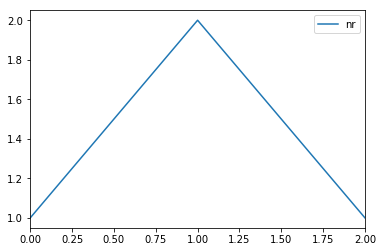

In [112]:
#df.plot(x='naam', y='IP-adres', style='o')
#df.groupby([df.index.date, 'naam']).count().plot(kind='bar')
ax1 =df.plot()
ax1.show()

### ploten op datum

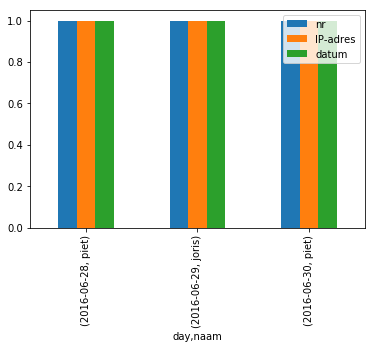

In [122]:
df['mydate'] = pd.to_datetime(df['datum'])
df = df.set_index('mydate')
df['day'] = df.index.date
counts = df.groupby(['day', 'naam']).agg(len)
counts.plot(kind='bar')